# Solving Blasius Equation by using shooting method and Python
**Written by: Pramudita Satria Palar, Ph.D.**

**Last updated: 29-October-2021**

This code demonstrates how to solve the Blasius equation by using the shooting method using Python. Blasius equation is a celebrated equation in fluid mechanics which, as the name suggests, is developed by Blasius.

Let's start by importing some necessary packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy import integrate

# Introduction

Our equation of interest is the Blasius equation, which reads as

$f'''+ff''=0$,

remember that $f = f(\eta)$ where $\eta = y \sqrt{\frac{U}{\nu x}} $ is our similarity variable, $U$ is the freestream velocity, and $\nu$ is the kinematic viscosity. The Blasius equation is a third-order nonlinear ordinary differential equation (ODE) that describes the steady two-dimensional laminar boundary layer on a semi-infinite plate with the angle of attack equal to zero (i.e., $\alpha=0$). When the plate is not parallel to the flow, we have the Falkner-Skan boundary layer which is a generalization of the Blasius equation.

For the sake of clarity,
*   $f = f(\eta)$
*   $f' = \frac{\partial f }{\partial \eta}=\frac{u}{U}$
*   $f'' = \frac{\partial^{2}f}{\partial \eta^{2}}$
*   $f''' = \frac{\partial^{3}f}{\partial \eta^{3}}$


What we want to solve is $f'''+ff''=0$ with $f(0)=0$, $f'(0)=0$, $f'(\infty)=1$. Remember that $f(\eta=0)$ acorresponds to $y=0$ 

This differential equation is recasted as a system of first order ODEs so that it can be solved numerically:

$y = [f;f';f''] = [y(1);y(2);y(3)]$

$dy/d\eta = [f';f'';f'''] = [y(2);y(3);\frac{1}{2}y(1)y(3)]$

# Solving the Blasius equation

We will use ```odeint``` from ```scipy``` to aid in solving the problem. However, we need to correctly guess the initial conditions so that the solution also satisfies the given boundary conditions. It is difficult to solve it on the first try, but you need your initial guess of the initial condition (say $\boldsymbol{\omega}$) to start trying. Remember that you need to aim for $f(0)=0$, $f'(0)=0$, $f'(\infty)=1$, so the next thing that you need to compare the resulting $f(0)$, $f'(0)$, $f'(\infty)$ from $\boldsymbol{\omega}$ with the target. It is highly likely that you will miss your target, but your next aim will surely be better. This is the essence of the shooting method: the initial condition is further refined until you hit your target; the resulting solution is then the solutions of your Blasius equation that correctly satisfy the boundary condition (i.e., your solutions are $f$,$f'$ and $f''$) 

First, we need to define a Python function which calculates the derivative:

In [2]:
# Define a function which calculates the derivative
def flatplate(f,eta):
    # Blasius differential equation for solving boundary layer velocities
    dydeta = [f[1],f[2],-1*f[0]*f[2]]
    return dydeta

In the following, we define a function ```solve_ODE``` which takes the initial condition ```F``` as the input. The ```solve_ODE``` routine essentially solves the recasted Blasius by using any values of the initial condition. We aim to find ```F``` that satisfies the boundary conditions of the Blasius problem, which is a boundary value problem. We will do that by trying to match the boundary conditions from an arbitrary value of ```F``` with the specified Blasius boundary conditions (i.e., $f(0)=0$, $f'(0)=0$, $f'(\infty)=1$). Let us define ```eval_boundary(F)``` which computes the error between our guess and the target. We then need specialized subroutines such as ```fsolve``` from ```scipy``` to solve this problem. 



In [3]:
def solve_ODE(F):
    eta = np.linspace(0,6,100) # eta grid
    fsol = odeint(flatplate,F,eta)
    return fsol 

def eval_boundary(F):
    # Find the solution to the ODE, given initial condition F
    fsol = solve_ODE(F)

    # Get the function values for BCs at the starting/end points
    f_start = fsol[0,0] #f(0) = 0
    df_start = fsol[0,1] #f'(0) = 0
    df_end = fsol[-1,1] #f'(inf)-1 = 0 

    # Evaluate the boundary (they should be close to zero)
    g = np.array([f_start, df_start, df_end-1])
    return g

Perform shooting method by using ```scipy.optimize.fsolve```. Notice that ```fsolve``` basically works by finding the root of the function, which does the job for the shooting method (it is essentially an optimization procedure, you want to find ```F``` that minimizes the error to the target boundary conditions):




In [4]:
f0 = [0.2,0.33,1.33] # Initial guess
root = fsolve(eval_boundary, f0) # Shooting method by using fsolve
sol = solve_ODE(root) # Solve the ODE by using the initial conditions from the shooting method.

Here, ```root``` is the initial condition that matches the boundary conditions, while ```sol``` is the solution of the boundary value problem from Blasius equation.

You can check your calculation by inputting again the solution (i.e., ```root```) to ```eval_boundary```. If you calculation is correct, it should yield values that are extremely close to zero (meaning that the error is already very small!).

In [5]:
g = eval_boundary(root)
print(g)

[-2.86118864e-28 -1.59872155e-29  0.00000000e+00]


And that, ladies and gentlement, is how we solve Blasius equation by using the Shooting method.

# Plot the Blasius solution

Let's do some extra stuffs. First, of course, you want to plot the solution. The following figure depicts $f$, $f'$, and $f''$ from the Blasius equation.

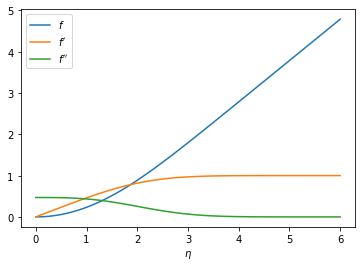

In [6]:
eta = np.linspace(0,6,100)
plt.plot(eta,sol[:,])
plt.xlabel('$\eta$')
plt.legend(['$f$','$f\'$','$f\'\'$'])
plt.show()

Having solved the Blasius equation, we can extract all necessary properties. For example, since
$\frac{u}{U}=f'$, we can calculate the non-dimensionalized $u$. Similarly, we can also plot the non-dimensionalized $v$, that is, $v/(\nu U / 2x)^{0.5} = \eta f'(\eta)-f(\eta)$. Although not detailed here (at least for now), you can calculate many other useful properties (e.g., shear stress) from the solution of the Blasius equation. 

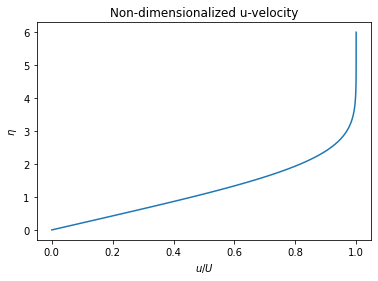

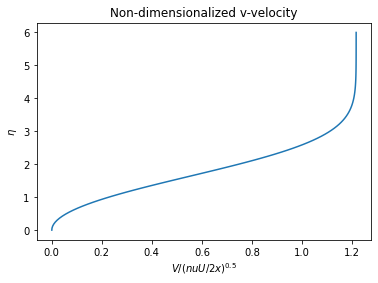

In [7]:
plt.plot(sol[:,1],eta)
plt.xlabel("$u/U$")
plt.ylabel("$\eta$")
plt.title("Non-dimensionalized u-velocity")
plt.show()

vndim = np.multiply(eta,sol[:,1])-sol[:,0]
plt.plot(vndim,eta)
plt.xlabel("$V/(nu U/2x)^{0.5}$")
plt.ylabel("$\eta$")
plt.title("Non-dimensionalized v-velocity")
plt.show()

# Thermal boundary layer

The differential equation that we want to solve is the energy equation written as ODE, reads as

$\frac{d^{2}\theta}{d \eta^{2}} + \frac{1}{2}Pr f \frac{d \theta}{d \eta}=0$,

where $Pr=\frac{\nu}{\alpha}$ ($\alpha$ is thermal diffusity) is the Prandtl number,

$\theta = \frac{T-T_{w}}{T_{\infty}-T_{w}}$,

$T$ is the temperature, $T_{w}$ is the wall temperature, and $T_{\infty}$ is the freestream temperature. The boundary conditions are $\theta(0)=0$ and $\theta(1)=1$

Notice that another possibility is to use:

$\theta_{alt} = \frac{T-T_{\infty}}{T_{w}-T_{\infty}}$.

In this tutorial, we use $\theta$ and not $\theta_{alt}$.

After some derivations, we have the following solution:
$\theta(\eta,Pr)=\frac{\int_{0}^{\eta}f''^{Pr} d \eta}{\int_{0}^{\infty}f''^{Pr} d \eta}$, which can be solved by a standard numerical integration routine. Notice that we need $f''$, which is the solution of the previous Blasius equation. Try varying the Prandtl number and see how it would affect the thermal boundary layer.


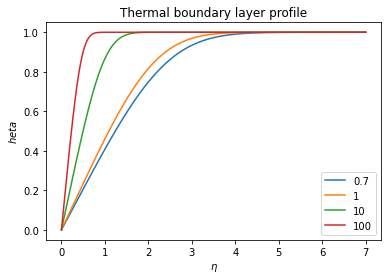

In [10]:
Pr = [0.7,1,10,100] # Prandtl number (you can make a list of it)

etat = np.linspace(0,7,1000) # eta, in linear space
fsol = odeint(flatplate,root,etat) # Solve by using the root from the previous Blasius equation

theta = np.zeros((len(Pr),len(etat))) # Initialize theta
for i in range(len(Pr)): 
    fsolpr = fsol[:,2]**Pr[i] 
    den = integrate.simps(fsolpr, etat) # Denumerator
    for j in range(len(etat)):    
        theta[i,j] = integrate.simps(fsolpr[0:j+1], etat[0:j+1]) / den

# Plot!
for i in range(len(Pr)):
    plt.plot(etat,theta[i,:])
    plt.xlabel("$\eta$")
    plt.ylabel("$\theta$")
    plt.title("Thermal boundary layer profile")

plt.legend(Pr)
plt.show()

**That's all!**